In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [46]:
X,y=make_blobs(n_samples=100,random_state=42,centers=2)

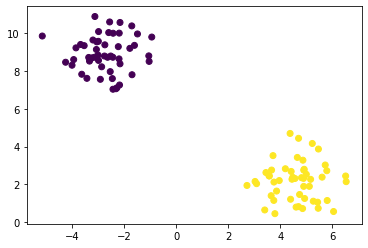

In [47]:
plt.scatter(X[:,0],X[:,1],c=y)

In [48]:
X=tf.constant(X,dtype=np.float64)
y=tf.constant(y.reshape(-1,1),dtype=np.float64)

In [49]:
X.shape

TensorShape([100, 2])

In [75]:
W=tf.Variable(np.zeros([X.shape[1],1],dtype=np.float64))
b=tf.Variable(0.0,dtype=np.float64)

In [76]:
m.shape

TensorShape([2, 1])

In [77]:
lr=0.1
max_step=30

In [78]:
@tf.function
def logis(X,y):
    with tf.GradientTape() as tape:
        z=tf.matmul(X,W) + b
        yp=tf.sigmoid(z)
        error=-((y*tf.math.log(yp))+(1-y)*(tf.math.log(1-yp)))
        loss=tf.reduce_mean(error)
        
    dm,dc=tape.gradient(loss,[W,b])
    W.assign_sub(lr*dm)
    b.assign_sub(lr*dc)
    return loss

In [79]:
err=[]
for i in range(max_step):
    err.append(logis(X,y))

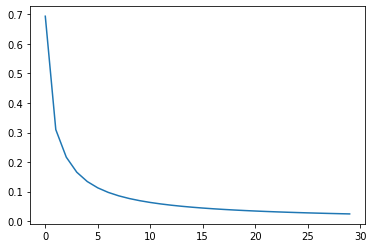

In [80]:
plt.plot(err)

In [86]:
m,b=W[0]/W[1],-b/W[1]

In [87]:
line=np.linspace(-6,6,5)

In [89]:
y_line=m*line +b

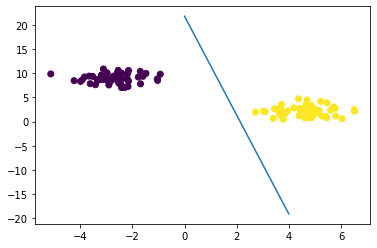

In [93]:
plt.scatter(X[:,0],X[:,1],c=y.numpy().flatten())
plt.plot(y_line)